<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/800x800-04.jpg" height="200" width="300"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер раз! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------

Приветствую вас внутри первой домашки. У каждой домашки должны быть свои герои (но это неточно). Моими героями являетесь вы! Вы - герои не потому, что я хочу кого-то простебать или обидеть, а потому что я всех вас очень люблю и хочу увековечить. Кто-то называет именами любимых людей вновь открытые звёзды и острова, кто-то вновь созданный вордовский файл для нира, а кто-то делает их героями своих историй. Я не Джордж Мартин, в моих историях никто не погибнет. 

__Краткий брифинг:__

* В тетрадке $ 10 $ задачек. Нужно решить любые пять.
* Некоторые задачи можно решить вручную. За это баллы не ставятся, но можно попробовать.
* Все решения выложу после дедлайна. 
* Дедлайн: следующая среда (25 апреля), утро. 
* Следующая пара начнётся с разбора домашки.

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# Внимание! Если вы делаете дз в Rstudio, то вам не нужны пакеты grid, repr и т.п.
# Вам нужен только пакет ggplot2! 

### Полезные функции: 

In [2]:
rep(2,5)  # повторяет число 2 целых 5 раз

[1] 2 2 2 2 2

In [3]:
seq(0,1,0.2)  # выдаёт все числа от 0 до 1 с шагом 0.2 

[1] 0.0 0.2 0.4 0.6 0.8 1.0

In [4]:
x <- c(1,2,3)
y <- c(2,-1,4)
z <- c(3,5,2)

pmin(x,y,z)   # находит поэлементные минимумы во всех векторах

[1]  1 -1  2

In [5]:
which.max(x) # выдаёт позицию максимума

[1] 3

### Задачка 1

В R куча встроенных наборов данных. Например, в наборе данных `chickwts` лежат веса куриц и тип корма, который используется для их выращивания.

In [6]:
head(chickwts,5)  # команда head позволяет посмотреть на
                  # первые пять строк таблички 

weight,feed
179,horsebean
160,horsebean
136,horsebean
227,horsebean
217,horsebean


Постройте гистограмму с распределением веса куриц с 20 столбиками. 

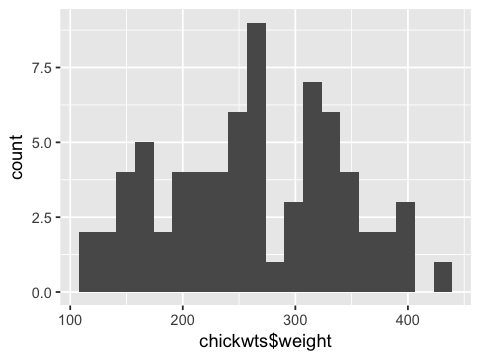

In [7]:
# легче лёгкого! 
qplot(chickwts$weight, bins=20)

Постройте эмпирическую функцию распределения для веса куриц. 

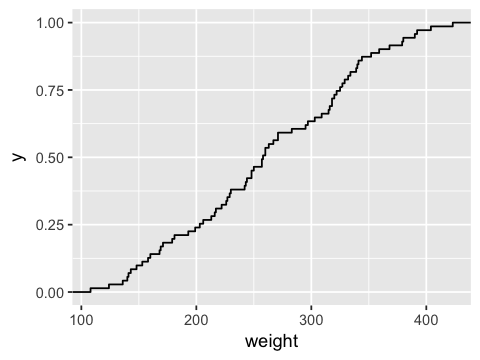

In [8]:
# скопипастим код из лекции
ggplot(chickwts, aes(x = weight))+   # на какой таблице строи график 
        stat_ecdf( )                 # какой именно график строим 

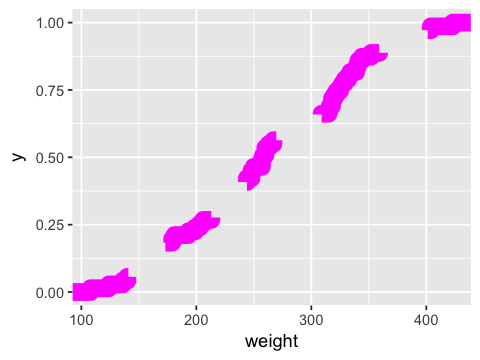

In [9]:
# Можно сделать график чуть красивше! Розовым, пунктирным и большим! 
ggplot(chickwts, aes(x = weight))+
        stat_ecdf(linetype = 'dashed', color = "magenta", size = 5)

Найдите базовые характеристики распределения:

* средний вес курицы
* медианный вес курицы
* дисперсию веса куриц 
* среднее квадратическо отклонения веса куриц 
* эмпирические квантили уровня 5%, 50% и 95%. 
* правда ли, что 50% квантиль совпал с медианой? А почему?

In [10]:
# сохраним вес курицы в отдельный вектор, чтобы было проще
x <- chickwts$weight
mean(x) # среднее

[1] 261.3099

In [11]:
median(x) # медиана

[1] 258

In [12]:
var(x) # дисперсия

[1] 6095.503

In [13]:
sd(x) # стандартное отклонение (корень из дисперсии)

[1] 78.0737

In [14]:
q = c(0.05, 0.5, 0.95)
quantile(x,q)

5%   50%   95% 
140.5 258.0 385.0

In [15]:
# конечно правда! Медиана это и есть 50% квантиль
median(x) == quantile(x, 0.5, names = FALSE)  # names отвечает за подписывание имён

[1] TRUE

Сделали упражнение? Ответили на вопросы? Вы офигенны! Вы уже можете больше, чем среднестатистический аудитор из большой четвёрки ;) Двигайтесь дальше в таком же темпе. 

### Задачка 2 

Случайные величины $X_1, \ldots, X_5$ имею равномерное распределение на отрезке $[0;1]$ и независимы. С помощью симуляций оцените:

а) $P(\min\{X_1, \ldots, X_5\} > 0.2)$

б) $P(\min\{X_1, \ldots, X_5\} > 0.2 \mid X_1 + X_2 < 0.5)$

в) $E(\min\{X_1, \ldots, X_5\})$

г) $E(\min\{X_1, \ldots, X_5\} \mid X_1 + X_2 < 0.5)$

Насколько логично то, что вы получили? Попробуйте порассуждать на эту тему. Постройте гистограмму для распределения минимума из этих случайных величини гистограмму для распределения максимума из этих случайных величин. Вспомните как выглядит теоретическая плотность распределения максимума и теоретическая плотность распределения минимума. Мы ещё с ними столкнёмся ;) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


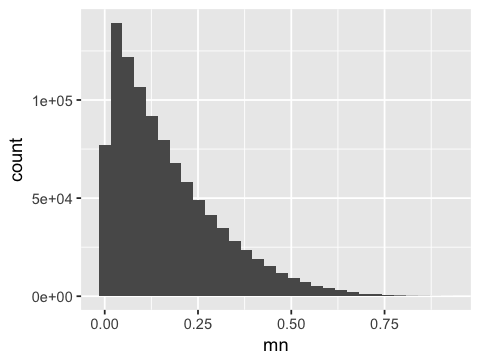

In [16]:
# немного осмысленной копипасты из леции
n_obs <- 10^6  # чтсло наблюдений

# пяток случайных величин
x_1 <- runif(n_obs, min = 0, max = 1)
x_2 <- runif(n_obs, min = 0, max = 1)
x_3 <- runif(n_obs, min = 0, max = 1)
x_4 <- runif(n_obs, min = 0, max = 1)
x_5 <- runif(n_obs, min = 0, max = 1)

# находим минимальное значение в каждой пятёрке чисел 
mn <- pmin(x_1, x_2, x_3, x_4, x_5)

qplot(mn)  # посмотрим на гистограмму, интересно же! 

In [17]:
success <- mn > 0.2     # TRUE будет стоять в тех местах, где это правда 
sum(success) / n_obs    # а вот и итоговая оценка вероятности! :) 

[1] 0.326883

In [18]:
# также легко решаем пункт b) 

uslovie = x_1 + x_2 < 0.5  # находим позиции, где выполнено условие 

success <- mn[uslovie] > 0.2  # делаем срез по этому условию 
sum(success) / n_obs          # наконец получаем оценку вероятности 
# Вполне логично, что она уменьшилась по сравнению с предыдущей, мы же наложили ограничения! 

[1] 0.0025

In [19]:
# решаем пункт c) 
mean(mn)

[1] 0.1664223

In [20]:
# и также пункт d) 
# Вполне логично, что математическое ожидание меньше, у нас же ограничения! 
mean(mn[uslovie])

[1] 0.06908545

### Задачка 3

Иван Фёдорович Крузенштерн (ШТО?!) случайным образом с возможностью повторов выбирает $10$ натуральных чисел от $1$ до $100$. Пусть $X$ — минимум из этих чисел, а $Y$ — максимум. С помощью симуляций оцените 

а) $ P(Y > 3X)$

б) $E(X \cdot Y)$

в) $P(Y > 3X \mid Y < X^2)$

г) $E(X \cdot Y \mid Y < X^2)$

д) $E \left( \frac{X}{X + 2Y} \right)$

е) $Corr(X,Y)$

In [21]:
# Ивану Фёдоровичу грех не помочь!
# Основная сложность этой задачи в генерации выборки, давайте попрубуем 
# разобраться пошагово и для начала сгенерируем только одну выборку

natural <- sample(1:100, size = 5, replace = TRUE)

natural

min(natural)  # случайная величина X
max(natural)  # случайная величина Y

# нам таких выборок понадобится очень много, придётся написать цикл для их генерации...

[1] 51 49 90  8 61

[1] 8

[1] 90

In [22]:
n_obs = 10^6
x = rep(0, n_obs)   # создаём два вектора из нулей, так будет быстрее работать 
y = rep(0, n_obs)   # чем ежели создавать пустой вектор (почему объясню на паре)
                    # в вектор x будем записывать минимумы, в y максимумы
for(i in 1:n_obs){
    natural = sample(1:100, size = 10, replace = TRUE)  # сгенерировали выборку
    x[i] = min(natural)                                 # нашли минимум и максимум для неё
    y[i] = max(natural)
}

# Вот и вся генерация, осталось только ответить на вопросы задачи
# a)

success = y > 3*x
sum(success) / n_obs  

[1] 0.97192

In [23]:
# б) 
mean(x*y)

[1] 885.2388

In [24]:
# в) 
usl = y < x^2

success <- y[usl] > 3*x[usl]
sum(success) / n_obs  

[1] 0.363526

In [25]:
# г) 
mean(x[usl]*y[usl])

[1] 1638.873

In [26]:
# д)
z = x/(x + 2*y)
mean(z)

[1] 0.04830752

In [27]:
# e)
cor(x,y)

[1] 0.1009892

### Задачка 4

Миша поступил на первый курс экономического факультета, потому что у него в крови всегда была предпренимательская жилка. На первом курсе она довела его, и он решил учёбу забросить и стать комерсом. На паблике "Бизнес-молодость" Миша подсмотрел шикарную бизнес-модель и решил, что будет торговать еженедельными газетами. На первом курсе Миша прослушал курс микроэкономики и понимает, что в условиях совершенной конкуренции, цену определяет рынок. Миша никак не может влиять на неё, однако он может влиять на то, какое количество газет следует закупить. На втором курсе Миша не учился. Из-за этого он не знает теорию вероятностей и вынужден для решения своих повседневных проблем нанять аналитика. 

Покупать газету Миша решил по $15$ рублей, а продавать за $30$. Количество потенциальных покупателей - случайная величина с распределением Пуассона. Опытным путём было установлено, что среднее значение этой величины равно $50$. Нераспроданные газеты ничего не стоят. Пусть $n$- количество газет, максимизирующее ожидаемую прибыль Мишы. 

a) С помощью компьютера найдите оптимальное значение $n$ и ожидаемую прибыль.

b) Правильно ли поступил Миша, что бросил учёбу и ушёл в коммерцию? 

In [28]:
# Ох уж этот Миша!  
# Найдём оптимальное количество газет для закупки!

n_obs = 10^6  # число наблюдений 

cost = 15   # издержки на покупку газеты 
price = 30  # цена, по которой будем продавать газету 

x = rpois(n_obs, lambda = 50)  # среднее значение совпадает с lambda

# посмотрим на прибыль, еслм мы будем продавать 30 газет!
# покупатели не могут купить больше 30 газет 
x[x > 30] = 30  # заменим всё, что больше 30 на 30

# найдём все прибыли
profit = x*price - 30*cost 

# найдём среднюю прибыль 
mean(profit)

[1] 449.938

In [29]:
# Отлично! Дело осталось за малым, перебрать все возможноые варианты покупок и выбрать оптимальный 

profits = rep(0,100) # будем записывать средние прибыли
for(s in 1:100){
    x = rpois(n_obs, lambda = 50)  # генерируем покупочки 
    
    x[x > s] = s  # нельзя продать лишнее
    
    profits[s] = mean(x*price - s*cost)  # запоминем среднюю прибыль
}

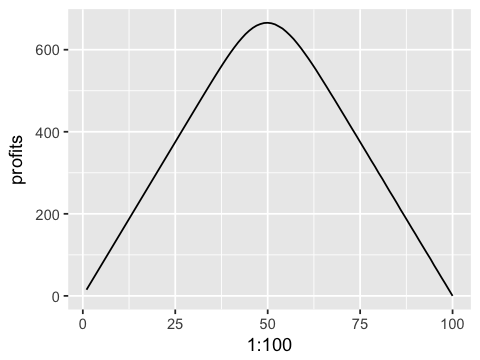

In [30]:
# Посмотрим на график средней прибыли. Вполне ожидаемо, что это парабола
qplot(1:100, profits, geom='line')

In [31]:
# Наконец мы видим прибыль Миши и сколько газет ему надо закупать :) 
max(profits)
which.max(profits)

[1] 665.6139

[1] 50

In [32]:
# b) На этот пункт у меня для вас ответа нет. 

### Задачка 5

Глеб раздобыл кубик и собирается как следует изучить его свойства. Для этого он подбросил его $n$ раз. Величина $X_1$ — число выпадений единицы, а $X_6$ — число выпадений $6$. Глебу интересно какова корреляцие между этими двумя случайными величинами. Что вам на этот счёт подсказывает интуиция? Какой знак будет у этой корреляии: положительным или отрицательным?

Оцените с помощью симуляций $Corr(X_1,X_6)$. Пусть $n=10$. Обратите внимание, что $n$ в данном случае это не количество симуляций. Десять подбрасываний это всего лишь одно испытание. После симуляций попытайтесь найти эту корреляцию руками. на бумажке. 

In [33]:
# подбросим кубик 10 раз и вычислим значения X1 и X6 

smpl = sample(size = 10, 1:6, prob = rep(1/6,6), replace = TRUE)

sum(smpl == 1) # это X1
sum(smpl == 6) # это X6

[1] 4

[1] 2

In [34]:
n_obs = 10^6  # сделаем 10 подбрасываний n раз

x1 = rep(0, n_obs)  # сюда будем записывать количество 1 в каждой серии испытаний
x6 = rep(0, n_obs)  # сюда будем записывать число 6 в каждой серии испытаний

for(i in 1:n_obs){
    smpl = sample(size = 10, 1:6, prob = rep(1/6,6), replace = TRUE) # первая серия испытаний!
    
    x1[i] = sum(smpl == 1)
    x6[i] = sum(smpl == 6)    
}

cor(x1, x6)

[1] -0.2009201

### Задача 6

Случайная величина $X$ распределена равномерно на отрезке $[0;1]$. Женя подкидывает эту случайную величину. Она принимает значение $x$. После подбрасывания Женя изготавливает монетку, которая выпадает «орлом» с вероятностью $x$ и передаёт её Дане. Даня, не зная $x$, подкидывает монетку один раз. Она выпала «орлом». 

a) Какова вероятность, что она снова выпадет «орлом»?

In [35]:
# смодулируем одну итерацию всего этого процесса

x = runif(1, min = 0, max = 1)        # Женя делает монетку
cat('Вероятность орла на монетке:',x)  # Команда cat это более пафосный print

# Даня два раза подкидывает монетку
y = sample(c('О','Р'), prob = c(x, 1-x), size = 2, replace = TRUE)
cat('\nУ Дани выпало:', y)

Вероятность орла на монетке: 0.7324506
У Дани выпало: О О

In [36]:
# Отлично! Теперь мы должны сделать как можно больше разных монет и подкинуть их как можно больше раз. 
# Из-за того, что наш эксперимент происходит последовательно, придётся подкидывать каждую монетку Жени много раз.

n_zenia = 100                       # сколько монеток сделал Женя
x = runif(n_obs, min = 0, max = 1)  # Женя делает свой ход n_zenia раз
x[1:5]                              # первые пять монеток, созданные Женей :) 

[1] 0.56802031 0.13880482 0.76850595 0.07998606 0.86479887

In [37]:
# Знаете, иногда так бывает, что тебе лень что-то делать и ты откладываешь это до лучших времён. 
# Вот и я отложил. Сейчас, когда я пишу это, до пары остаётся два часа. Можно было бы взять и 
# написать тут два цикла для генерации вероятностей вместо это текста, но я не хочу их писать. 
# Они будут большими и страшными. И вообще я бы эту задачку лучше бы убрал из домашки, так как 
# она для генераций не очень удачная. 

b) Как выглядит ответ, если Дане известно, что монетка при $n$ подбрасываниях $k$ раз выпадала орлом? 

In [38]:
# Ня! Решение пропущено. Или отложено до лучших времён. Не знаю. 

А сможете найти эти вероятности вручную? 

### Задачка 7.1 

Пусть $X \sim Exp(2)$. Аня помнит, что такое распределение называется экспоненциальным и что в такой ситуации функция распределения случайной величины $X$ выглядит как: 

$$ F(x) = 1 - e^{-2 x}$$

Аня хочет понять какое распределение будет у случайной величины $Y$, если 

$$ Y = 1 - e^{-2 X}$$ 

Попробуйте ссимулировать такую случайную величину, посмотреть на её гистограмму и дать ответ на вопрос Ани. Подумайте почему ответ получился именно таким.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


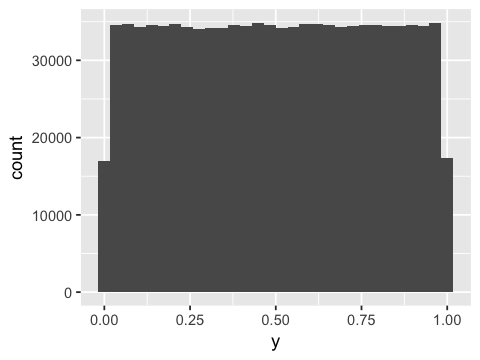

In [39]:
n_obs = 10^6
x = rexp(n_obs, rate = 2)
y = 1 - exp(-2*x)
qplot(y)           # равномерная на отрезке [0; 1]

### Задачка 7.2

Маша и Виолетта живут в общежитии в одной комнате. Маша постоянно что-то говорит про нейронные сети. Виолетта не очень понимает о чём идёт речь, но хотела бы разобраться, чтобы быть с подругой на одной волне. Для этого она залезла в [мудрую книгу](https://yadi.sk/i/wBswqtL33UDYsD) и стала читать. В одной из первых глав она узнала, что в качестве функции активации в нейронах часто используют сигмоида, которая представляет из себя функцию распределения для логистической случайной величины. Функция выглядит как-то так: 

$$ F(x) = \frac{1}{1 + e^{-x}} $$

Виолетта пока не поняла что такое нейрон, сигмоида и функция активации, зато она очень хорошо знает что такое распределение случайной величины. Ей жутко интересно как оно выглядит.

а) Помогите Виолетте сгенирировать случайную величину $X$, имеющую логистическое распределение. Постройте для неё гистограмму, плотность и функцию распределения прямо как на паре. 

б) Также Виолетте хотелось бы узнать какое распределение будет у случайной величины $Y = F(X)$. Попробуйте посмотреть на него с помощью симуляций. Как следует подумайте почему ответ получился именно таким. Функция `rlogis` с параметрами `location = 0` и  `scale = 1` вам в помощь! 

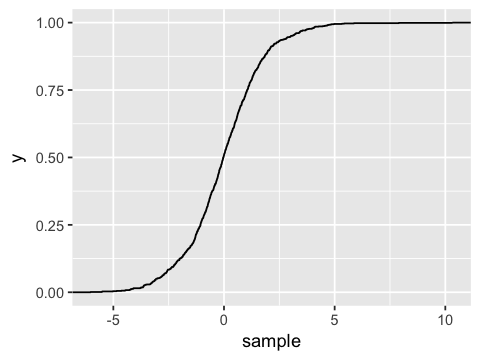

In [40]:
# a) 
n_obs = 10^3 # не будем генерировать особо много, а то функция не построится и всё зависнет 

x = rlogis(n_obs, location=0, scale=1)  #сгенерировали

# построим функцию распределения 
df = data.frame(sample = x)
ggplot(df, aes(x = sample)) + stat_ecdf( )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


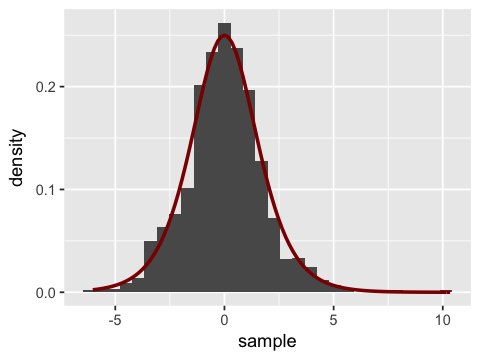

In [41]:
# построи гистограмму и плотность 
ggplot(df, aes(x = sample))+
            # Наносим гистограмму 
            geom_histogram(aes(y = ..density..))+  # опция ..density.. нормирует площадь гистограмы к 1
                                                   # попробуйте стереть её и посмотреть что будет 
             # Наносим плотность распределения
            stat_function(fun = dlogis, args = c(0,1), color = "darkred", size=1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


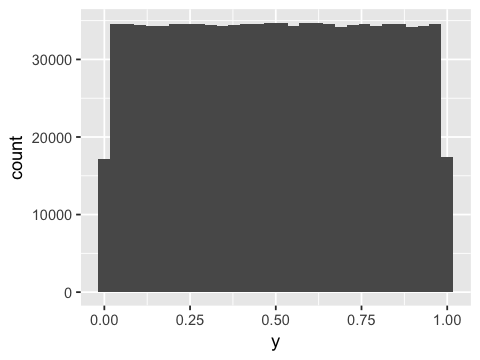

In [42]:
# b) сгенерируем выборку в нормальном объёме 
n_obs = 10^6
x = rlogis(n_obs, location=0, scale=1)  #сгенерировали

y = 1/(1 + exp(-x))
qplot(y)           # равномерная на отрезке [0; 1]

Воу, воу, воу, теория вероятностей, палехче! В обеих задачах получился одинаковый ответ. Видимо, в случайной величине $Y = F(X)$, где $F(x)$ - функция распределения случайной величины $X$, есть какая-то магия. Подумайте о том какая и постарайтесь доказать наличие этой магии на бумаге. На семинаре мы попробуем сделать это совместно. 

### Задачка 9 

Было бы нечестно, если после задач $7.1$ и $7.2$ следовала бы задачка с номером $8$. Поэтому тут задачка с номером $9$! 

Есть две монеты, у которых вероятности выпадения орла при однократном подбрасывании равны $0.6$ и $0.4$. Камила подбрасывает первую монетку до появления орла. Вика делает то же самое со второй монеткой. Найдите с помощью симуляций вероятность того, что 

a) Вика сделает больше подбрасываний, чем Камила;

b) Камила сделает больше подбрасываний, чем Вика;

c) Камила и Вика сделают одинаковое число подбрасываний.

d) Верно ли, что в сумме эти три вероятности дают единицу? Логично ли это? 

e) Найдите математическое ожидание суммарного количества бросков. 

In [43]:
n_obs = 10^6
p1 = 0.6
p2 = 0.4 

# симулируем подбрасывания Вики и Камилы
x_kamila = rgeom(n_obs, prob = p1)
x_vika = rgeom(n_obs, prob = p2)

x_kamila[1:10]  # в векторе стоит число подбрасываний до первого орла

[1] 0 3 1 2 0 1 0 0 0 0

In [44]:
# a)  # логично, Вике больше повезло с монткой!
sum(x_vika > x_kamila)/n_obs

[1] 0.473891

In [45]:
# b) 
sum(x_vika < x_kamila)/n_obs

[1] 0.211154

In [46]:
# c) 
sum(x_vika == x_kamila)/n_obs

[1] 0.314955

In [47]:
# d) 
# да, эти вероятности дадут в сумме единицу, потому что других исходов не бывает
sum(x_vika > x_kamila)/n_obs + sum(x_vika < x_kamila)/n_obs + sum(x_vika == x_kamila)/n_obs

[1] 1

In [48]:
# e) 
mean(x_vika + x_kamila)

[1] 2.16823

Продемонстрируйте с помощью симуляций, что у геометрического распределения нет памяти. Определение [отсутствия памяти ищи тут](https://ru.wikipedia.org/wiki/Геометрическое_распределение). Что это означает для Вики и Камилы? 

Читаем определение! У распределения нет памяти, если количество прошлых неудач не влияет на количество будущих неудач

$$ P( Y >  m + n \mid Y \ge m) = P(Y > n).$$ 

Ровно это и закодим.

In [49]:
n_obs <- 10^7
p <- 0.2 

y <- rgeom(n_obs, prob = p)

sum(y > 3)/n_obs  # Правая часть равенства 

[1] 0.4094854

In [50]:
# Левая часть равенства 
y = y[y >= 2] 
sum(y > 2 + 3)/length(y)  

[1] 0.4099322


Эту задачку тоже можно решить руками на бумаге. Слабо? 

### Задачка 10

Света очень долго сидела и думала. В конечном счёте у неё возникло очень много разнообразных вопросов. Помогите Свете ответить на них. 

a) Пусть $X \sim N(5,9)$, а $Y \sim N(3, 16)$. Верно ли, что сумма нормальных случайных величин будет нормальной случайной величиной? Какими будут математическое ожидние и дисперсия у итоговой случайной величины.  Проверьте это с помощью симуляций.

___ВНИМАНИЕ:___ код с симуляциями ни в коем случае не является доказательством верных фактов, их строгие доказательства можно найти в лекциях. Но при этом он является опровержением неверных фактов. Помните о том, что в математике да это всегда да, а нет это хотя бы один раз нет. 

[1] 7.976705

[1] 25.50998

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


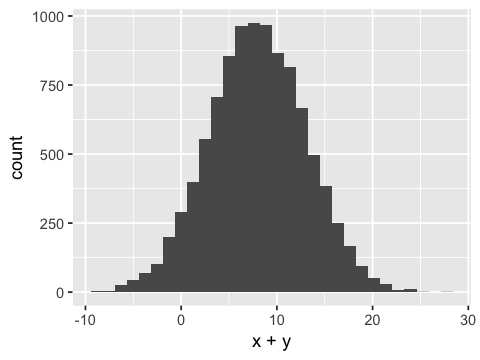

In [51]:
n_obs = 10^4
x <- rnorm(n_obs, mean=5, sd=3)  # обратите внимание, что мы указываем sd а не дисперсию!
y <- rnorm(n_obs, mean=3, sd=4)

mean(x+y)     # 8 = 5 + 3     всё как в лекциях!
var(x+y)      # 25 = 9 + 16   снова всё как в лекциях!
qplot(x + y)  # посмотрим на гистограмку :3

b) Пусть $X \sim N(\mu, \sigma^2)$. Верно ли, что $\frac{X-\mu}{\sigma} \sim N(0,1)$? Проверьте это с помощью симуляций. 

[1] 0.009674222

[1] 1.025167

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


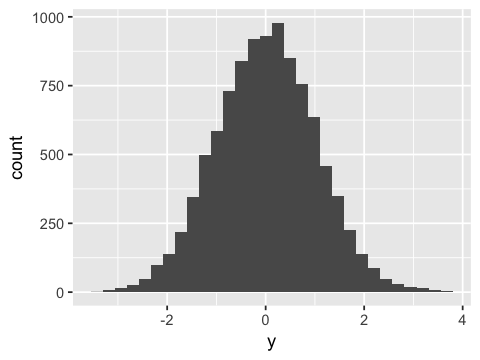

In [52]:
# конечно верно! такая процедура называется стандартизацией случайной величины 
# хорошо бы попробовать код для разных примеров нормальных случайных величин

x = rnorm(n_obs, mean=5, sd=3)
y = (x - 5)/3
mean(y)
var(y)
qplot(y)

с) Пусть $X \sim U[0;1]$ и $Y \sim U[0;1]$. Верно ли, что $X + Y$ также будет иметь равномерное распределение? Проверьте это с помощью симуляций? 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


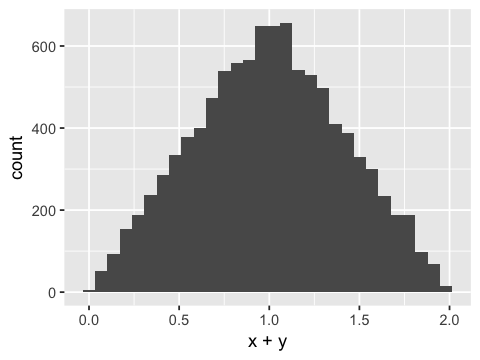

In [53]:
# конечно неверно, это чушь! сумма равномерных величин иметт распределение треугольника

x <- runif(n_obs, min = 0, max = 1)
y <- runif(n_obs, min = 0, max = 1)
qplot(x+y)

d) Пусть $X \sim U[0;1]$. Какое распределение будет у $Y = 5 + 3\cdot X$? Узнайте это с помощью симуляций. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


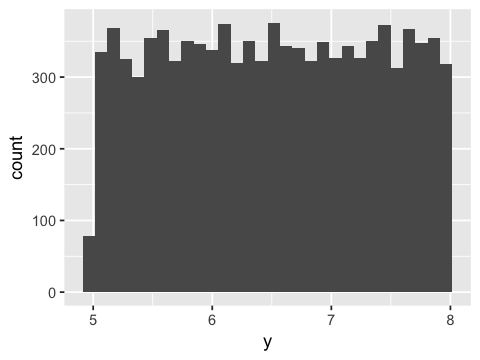

In [54]:
# она будет равномерной на отрезке от 5 до 8 :) 
# мы сдвинули распределение вправо на 5 и растянули в три раза

x <- runif(n_obs, min = 0, max = 1)
y = 5 + 3*x
qplot(y)

Когда сумма случайных величин из одного семейства даёт случайную величину из этого же семейства, то такое распределение называется устойчивым относительно суммирования. Получилось ли, что нормальное и равномерное распределения устойчивы относительно суммирования?  Как думает распределение Пуассона, экспоненциальное и Хи-квадрат устойчивы относительно суммирования? 

Найдите в лекциях по теории вероятностей весь материал, который касается свойств нормального распределния и повторите его. 